In [1]:
import math
import pandas as pd
from langdetect import detect
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt

In [2]:
lem = WordNetLemmatizer() #create lemmatizer

In [3]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shirinharandi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv('/Users/shirinharandi/Desktop/COMP0031/Data/en_reviews/tokyo_en.csv')
listings = pd.read_csv('/Users/shirinharandi/Desktop/COMP0031/Data/listings/tokyo_listings.csv')
listings

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35303,https://www.airbnb.com/rooms/35303,20191128233834,2019-11-29,"La Casa Gaienmae C Harajuku, Omotesando is nearby",This shared flat is locating at very close to ...,This apartment is 3 bedroom flat shared with t...,This shared flat is locating at very close to ...,none,10 min walking to Harajuku ~ Urahara ~ Omotesa...,...,f,f,strict_14_with_grace_period,f,f,3,2,1,0,0.19
1,197677,https://www.airbnb.com/rooms/197677,20191128233834,2019-11-29,Oshiage Holiday Apartment,NaN,"We are happy to welcome you to our apartment, ...","We are happy to welcome you to our apartment, ...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,1.60
2,289597,https://www.airbnb.com/rooms/289597,20191128233834,2019-11-29,Private apt in central Tokyo #203,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,1.22
3,370759,https://www.airbnb.com/rooms/370759,20191128233834,2019-11-29,"Cozy flat #203, local area YET 10 mins to shib...","So close to busy centers, yet so peaceful! Jus...","Cozy and Relaxing, at home feeling in a reside...","So close to busy centers, yet so peaceful! Jus...",none,Peaceful and residential area just 10 mins awa...,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.47
4,700253,https://www.airbnb.com/rooms/700253,20191128233834,2019-11-29,Private apt in central Tokyo #201,NaN,::::::::::::::::::::::::::::::::::::::::::::::...,::::::::::::::::::::::::::::::::::::::::::::::...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13757,40413103,https://www.airbnb.com/rooms/40413103,20191128233834,2019-11-29,【MONTHLY!】HOUSE IN ASAKUSA. SKY TREE! MAX 16 PP!,Recently built! Spacious! Great location! 2 st...,【House Facility】 - Futon x 16 - Japanese foot ...,Recently built! Spacious! Great location! 2 st...,none,The nearest station is Asakusa station. It is ...,...,f,f,strict_14_with_grace_period,f,f,28,28,0,0,NaN
13758,40413645,https://www.airbnb.com/rooms/40413645,20191128233834,2019-11-29,"3BR House, Easy access to Shinjuku/Shibuya Area!",Enjoy full access to your own 3 bedroom house ...,The house is larger than most Japanese size pl...,Enjoy full access to your own 3 bedroom house ...,none,Tabata station is an inspiring haven of creati...,...,t,f,flexible,f,f,16,16,0,0,NaN
13759,40415207,https://www.airbnb.com/rooms/40415207,20191128233834,2019-11-29,★SHEN HOUSE★COZY★E★supermarkets nearby★,★ The home stay is located in the living area ...,"★ 25 square meters, dedicated for urban living...",★ The home stay is located in the living area ...,none,★ Please do not make any noise in the room aft...,...,t,f,strict_14_with_grace_period,f,f,24,24,0,0,NaN
13760,40417564,https://www.airbnb.com/rooms/40417564,20191128233834,2019-11-29,池袋新宿渋谷､上野東京横浜直通赤羽民泊,赤羽岩淵駅徒歩30秒､赤羽駅徒歩5分,清潔､ｱｯﾄﾎｰﾑな雰囲気,赤羽岩淵駅徒歩30秒､赤羽駅徒歩5分 清潔､ｱｯﾄﾎｰﾑな雰囲気 365/24 TElMAI...,none,商店街至近､交通便利,...,t,f,moderate,f,f,1,1,0,0,NaN


In [5]:
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,dict_proportion
0,35303,810980,2011-12-28,1502908,Firuz,Miyuki's has been a great host. Helpful and ve...,en,0.053279
1,35303,2467161,2012-10-01,350719,Jordan,Nice apartment in one of the best areas of Tok...,en,0.052817
2,35303,3572628,2013-02-18,4917704,Aymeric,A very nice host and place. The location is in...,en,0.055556
3,35303,3952097,2013-03-30,3243253,Blandine,Miyuki is the most smily face I met when I lan...,en,0.042071
4,35303,4377509,2013-05-01,1536097,Kayleigh,The location's wonderful. It's close to Haraju...,en,0.064426
...,...,...,...,...,...,...,...,...
235399,40148789,567628035,2019-11-23,25926619,Mizuki,It is a nice cozy room. Very near to the stati...,en,0.071429
235400,40155090,567638389,2019-11-23,64148135,Sophie,Great room in a very central location. Very cl...,en,0.058140
235401,40162550,568061780,2019-11-24,127609714,Bonnie,A great location and stylish place. Host is gr...,en,0.068182
235402,40162550,569588204,2019-11-27,74054421,David,"Amazing places, its just like my apparent bac...",en,0.039106


In [6]:
listings = listings[['id', 'room_type', 'calculated_host_listings_count']].copy()
listings

,id,room_type,calculated_host_listings_count
0,35303,Private room,3
1,197677,Entire home/apt,1
2,289597,Entire home/apt,2
3,370759,Entire home/apt,3
4,700253,Entire home/apt,2
...,...,...,...
13757,40413103,Entire home/apt,28
13758,40413645,Entire home/apt,16
13759,40415207,Entire home/apt,24
13760,40417564,Entire home/apt,1


In [7]:
listings['is_superhost'] = np.where(listings['calculated_host_listings_count'] >= 10, 'Yes', listings['calculated_host_listings_count'])
listings['is_superhost'] = np.where(listings['calculated_host_listings_count'] < 10, 'No', listings['is_superhost'])
listings = listings.rename(columns={"id": "listing_id"})
listings

,listing_id,room_type,calculated_host_listings_count,is_superhost
0,35303,Private room,3,No
1,197677,Entire home/apt,1,No
2,289597,Entire home/apt,2,No
3,370759,Entire home/apt,3,No
4,700253,Entire home/apt,2,No
...,...,...,...,...
13757,40413103,Entire home/apt,28,Yes
13758,40413645,Entire home/apt,16,Yes
13759,40415207,Entire home/apt,24,Yes
13760,40417564,Entire home/apt,1,No


In [8]:
out = pd.merge(df, listings, on='listing_id')
out

,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,dict_proportion,room_type,calculated_host_listings_count,is_superhost
0,35303,810980,2011-12-28,1502908,Firuz,Miyuki's has been a great host. Helpful and ve...,en,0.053279,Private room,3,No
1,35303,2467161,2012-10-01,350719,Jordan,Nice apartment in one of the best areas of Tok...,en,0.052817,Private room,3,No
2,35303,3572628,2013-02-18,4917704,Aymeric,A very nice host and place. The location is in...,en,0.055556,Private room,3,No
3,35303,3952097,2013-03-30,3243253,Blandine,Miyuki is the most smily face I met when I lan...,en,0.042071,Private room,3,No
4,35303,4377509,2013-05-01,1536097,Kayleigh,The location's wonderful. It's close to Haraju...,en,0.064426,Private room,3,No
...,...,...,...,...,...,...,...,...,...,...,...
235399,40148789,567628035,2019-11-23,25926619,Mizuki,It is a nice cozy room. Very near to the stati...,en,0.071429,Entire home/apt,2,No
235400,40155090,567638389,2019-11-23,64148135,Sophie,Great room in a very central location. Very cl...,en,0.058140,Entire home/apt,12,Yes
235401,40162550,568061780,2019-11-24,127609714,Bonnie,A great location and stylish place. Host is gr...,en,0.068182,Entire home/apt,1,No
235402,40162550,569588204,2019-11-27,74054421,David,"Amazing places, its just like my apparent bac...",en,0.039106,Entire home/apt,1,No


In [9]:
# out.to_csv(r'property_type_and_superhosts/tokyo_type.csv')

In [10]:
dictionary = pd.read_csv('../data/processedDict.csv')
dictionary['word'] = dictionary['word'].apply(lambda x: lem.lemmatize(x, pos='n'))

In [11]:
# filepath = '../data/en_reviews/Manchester.csv'
# reviews = pd.read_csv(filepath)

# reviews = reviews['date']
# reviews

reviews = out 
table = str.maketrans('', '', string.punctuation) #mapping to strip punctuation in review

#strip punct of each review -> lemmatise -> output is list of words so join into sentences
reviews['comments'] = reviews.comments.apply(lambda review: ' '.join(map(str, [lem.lemmatize(word.translate(table), pos='n') for word in review.lower().split()])))
reviews

reviews['date'] = pd.to_datetime(reviews['date'])

In [12]:
#### DELETE THIS LATER ###
mask = (reviews['date'] >= '2014-01-01') & (reviews['date'] < '2017-01-01')
reviews = reviews.loc[mask].copy()
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,dict_proportion,room_type,calculated_host_listings_count,is_superhost
7,35303,19211289,2014-09-08,2893501,Yan,thanks miyuki for a great stay a described cle...,en,0.043478,Private room,3,No
8,35303,23170075,2014-11-24,8674085,San,it wa great stay everything wa a described and...,en,0.035176,Private room,3,No
9,35303,27408652,2015-03-03,27944062,Kim Seng,my first ever solo trip to tokyo japan ha been...,en,0.058496,Private room,3,No
10,35303,27846973,2015-03-13,28171041,Matt,this wa a lovely place to stay for my first ti...,en,0.047923,Private room,3,No
11,35303,30457445,2015-04-22,17232501,James,miyuki wa a very accommodating host that offer...,en,0.046225,Private room,3,No
...,...,...,...,...,...,...,...,...,...,...,...
91745,16460921,123558788,2016-12-29,47496794,焱,great place to stay home is a bit cold even if...,en,0.050000,Entire home/apt,11,Yes
92183,16471345,124015197,2016-12-31,27950605,JooHee,this is in a very convenient spot right by shi...,en,0.066667,Entire home/apt,14,Yes
92300,16471780,122962520,2016-12-26,546631,Audrey,my family and i came from osaka and checked in...,en,0.041170,Entire home/apt,14,Yes
92403,16480522,122514971,2016-12-23,51882443,Ben,very nice house and host wa very nice really g...,en,0.047244,Private room,3,No


In [13]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,dict_proportion,room_type,calculated_host_listings_count,is_superhost
7,35303,19211289,2014-09-08,2893501,Yan,thanks miyuki for a great stay a described cle...,en,0.043478,Private room,3,No
8,35303,23170075,2014-11-24,8674085,San,it wa great stay everything wa a described and...,en,0.035176,Private room,3,No
9,35303,27408652,2015-03-03,27944062,Kim Seng,my first ever solo trip to tokyo japan ha been...,en,0.058496,Private room,3,No
10,35303,27846973,2015-03-13,28171041,Matt,this wa a lovely place to stay for my first ti...,en,0.047923,Private room,3,No
11,35303,30457445,2015-04-22,17232501,James,miyuki wa a very accommodating host that offer...,en,0.046225,Private room,3,No
...,...,...,...,...,...,...,...,...,...,...,...
91745,16460921,123558788,2016-12-29,47496794,焱,great place to stay home is a bit cold even if...,en,0.050000,Entire home/apt,11,Yes
92183,16471345,124015197,2016-12-31,27950605,JooHee,this is in a very convenient spot right by shi...,en,0.066667,Entire home/apt,14,Yes
92300,16471780,122962520,2016-12-26,546631,Audrey,my family and i came from osaka and checked in...,en,0.041170,Entire home/apt,14,Yes
92403,16480522,122514971,2016-12-23,51882443,Ben,very nice house and host wa very nice really g...,en,0.047244,Private room,3,No


In [14]:
def get_trends_nice(category, subcats, reviews):
    years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
    allwords = reviews['comments'].tolist()
    allwords = " ".join(allwords)
    unique_words = set(allwords.split(' '))
    len(unique_words)

    unique_words = list(unique_words)
    unique_words = [string for string in unique_words if string != ""]
#     len(unique_words)

    ls = []
    for word in unique_words:
        word = ''.join([i for i in word if not i.isdigit()])
        ls += [word]
    unique_words= ls
    unique_words = [string for string in unique_words if string != ""]
    unique_words = list(dict.fromkeys(unique_words))

    def countWords(word, review):
        count = 0
        for i in review:
            if i == word:
                count+=1
        return count

    def getDenom(review, unique_words):
        count = 0
        den = 0
        ls = []
        review = review.split()
        for word in review:
            kmp = countWords(word, review)
            if (kmp > 0 and word not in ls):
                ls += [word]
                den += math.log(1 + kmp)
        return den

    reviews['den'] = reviews['comments'].apply(lambda x: getDenom(x, unique_words))

    def getNom(category, review, dictionary, cat_levl="cat_lev1"):
        nom = 0
        review = review.split()
        dictionaryWords = dictionary[(dictionary[cat_levl] == category)]
        dictionaryWords = dictionaryWords['word']
        for word in dictionaryWords:
            nom += math.log(1 + review.count(word))
        return nom

    reviews['temp'] = reviews['comments'].apply(lambda x: getNom(category, x, dictionary))
    reviews[category] = reviews['temp']*100/reviews['den']

    k = {}
    for subcat in subcats:
        temp = reviews['comments'].apply(lambda x: getNom(subcat, x, dictionary, cat_levl="cat_lev1"))
        reviews[subcat] = temp * 100 / reviews["den"]
        k[subcat] = reviews[subcat].loc[reviews[subcat] > 0].min()
        
    print(k)
    
    k_business= reviews[category].loc[reviews[category] > 0]
    k_business = k_business.min()
    print(k_business)

    def adoptionForSetOfReviews(category, setOfReviews, dictionary, startDate, endDate, k):
        adoption = 1
        mask = (setOfReviews['date'] >= startDate) & (setOfReviews['date'] < endDate)
        setOfReviews = setOfReviews.loc[mask]
        setOfReviews = setOfReviews[category]
        if (len(setOfReviews) == 0):
            return 0
        else:
            b = 1/len(setOfReviews)
            for review in setOfReviews:
                adoption *= math.pow((review + k),b)
            adoption = adoption - k
            return adoption

    d2 = {'year' : years, 'value':0.0}
    out = pd.DataFrame(data=d2)
    
    for i in range(len(years)):
        out.at[i, "value_{}".format(category)] = adoptionForSetOfReviews(category, reviews, dictionary, "{}-01-01".format(years[i]), "{}-01-01".format(years[i] + 1), k_business)
#         for subcat in subcats:
#             out.at[i, "value_{}_{}".format(category, subcat)] = adoptionForSetOfReviews(subcat, reviews, dictionary, "{}-01-01".format(years[i]), "{}-01-01".format(years[i] + 1), k[subcat])

    return out

In [15]:
house_types = ["Private room", "Entire home/apt", "Shared room"]

{'s': nan, 'o': nan, 'c': nan, 'i': nan, 'a': nan, 'l': nan}
0.3469604658318127


<BarContainer object of 10 artists>

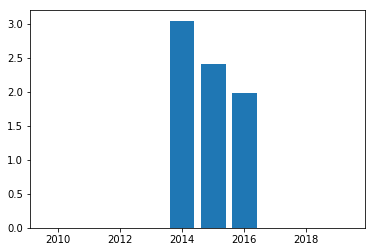

In [16]:
r = reviews.loc[reviews["room_type"] == house_types[0]].copy()

temp = get_trends_nice("social", "social", r)
plt.bar(temp["year"], temp["value_social"])

{'s': nan, 'o': nan, 'c': nan, 'i': nan, 'a': nan, 'l': nan}
0.34456163927256545


<BarContainer object of 10 artists>

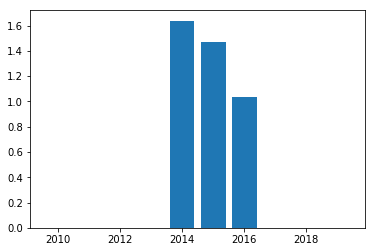

In [17]:
r = reviews.loc[reviews["room_type"] == house_types[1]].copy()

temp = get_trends_nice("social", "social", r)
plt.bar(temp["year"], temp["value_social"])

{'s': nan, 'o': nan, 'c': nan, 'i': nan, 'a': nan, 'l': nan}
0.5392772461704942


<BarContainer object of 10 artists>

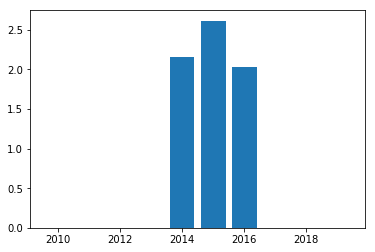

In [18]:
r = reviews.loc[reviews["room_type"] == house_types[2]].copy()

temp = get_trends_nice("social", "social", r)
plt.bar(temp["year"], temp["value_social"])

{'b': nan, 'u': nan, 's': nan, 'i': nan, 'n': nan, 'e': nan}
1.33633200713629


<BarContainer object of 10 artists>

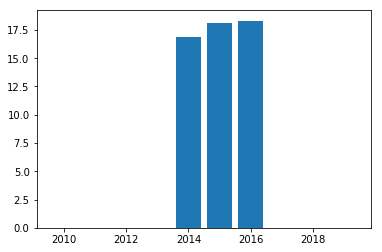

In [19]:
r = reviews.loc[reviews["room_type"] == house_types[0]].copy()

temp = get_trends_nice("business", "business", r)
plt.bar(temp["year"], temp["value_business"])

In [ ]:
r = reviews.loc[reviews["room_type"] == house_types[1]].copy()

temp = get_trends_nice("business", "business", r)
plt.bar(temp["year"], temp["value_business"])

In [ ]:
r = reviews.loc[reviews["room_type"] == house_types[2]].copy()

temp = get_trends_nice("business", "business", r)
plt.bar(temp["year"], temp["value_business"])